# Lollipop chart - wykres ilości osób zmarłych

Dane o ilości osób zmarłych - pierwszy wiersz dla roku 2019 i 2020 z ramki danych: *Zgony według tygodni* - źródło: GUS


Dane o ilości osób zmarłych na COVID-19: *COVID-19 w Polsce - zbiór danych stworzony przez Michała Rogalskiego* ; pod uwagę została wzięta ramka danych trzymająca zsumowaną ilość przypadków śmiertelnych dla każdego z województw


Dane od 28.09 do 01.11


Dane do wykresu na podstawie powyższych ramek danych

In [1]:
import numpy as np
import pandas as pd

df1 = pd.read_csv("df_dane_lollipop_chart.csv", sep=";")
df1['rok_2020_bez_covida'] = df1.rok_2020 - df1.rok_2020_covid
df1.head()

,wojewodztwo,rok_2019,rok_2020,rok_2020_covid,ilosc_mieszkancow_2019,ilosc_mieszkancow_2020,rok_2020_bez_covida
0,Śląskie,4862,6746,396,4533565,4517635,6350
1,Mazowieckie,5439,7140,320,5403412,5423168,6820
2,Małopolskie,3203,5122,458,3400577,3410901,4664
3,Wielkopolskie,3222,4446,353,3493969,3498733,4093
4,Dolnośląskie,3047,4020,178,2901225,2900163,3842


## Wykres

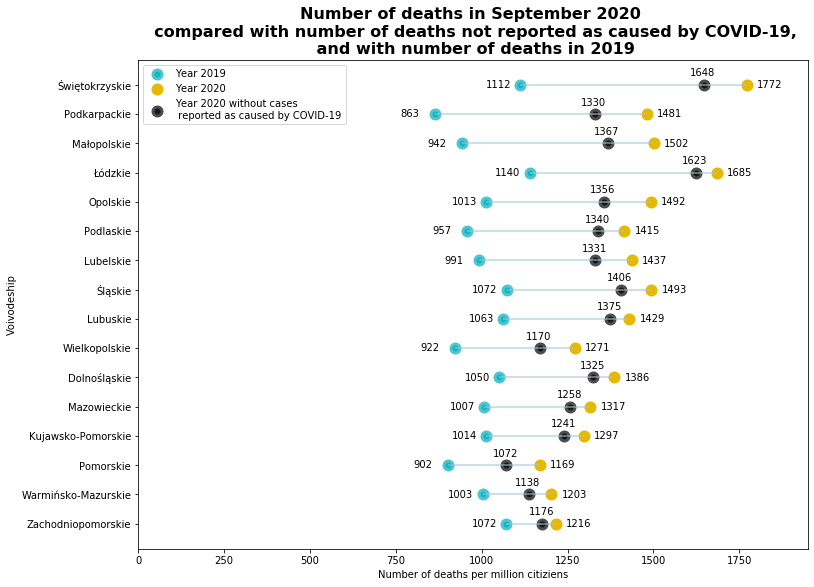

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 9] # ustawienia wielkości wykresu

rok2020 = df1.rok_2020 / df1.ilosc_mieszkancow_2020 *10**6
rok2019 = df1.rok_2019 / df1.ilosc_mieszkancow_2019 *10**6
rok2020_bez_covida = df1.rok_2020_bez_covida / df1.ilosc_mieszkancow_2020 *10**6

roznica = rok2020 - rok2019

df = pd.DataFrame({'wojewodztwo': df1.wojewodztwo, 
                   'rok2020': rok2020, 
                   'rok2020_bez_covida' : rok2020_bez_covida,
                   'rok2019': rok2019, 
                   'roznica': roznica})

ordered_df = df.sort_values(by = 'roznica') # sortujemy wg. województw, które miały największą zmianę w ilości zgonów
my_range = range(1,len(df.wojewodztwo)+1)

plt.hlines(y=my_range, xmin=ordered_df['rok2019'], 
           xmax=ordered_df['rok2020'], color='#a3c4dc', alpha=0.7)
plt.scatter(ordered_df['rok2019'], my_range, 
            color='#00AFBB', alpha=0.7 , label='Year 2019',
           linewidths = 6)
plt.scatter(ordered_df['rok2020'], my_range, 
            color='#E7B800', alpha=1, label='Year 2020',
           linewidths = 6)
plt.scatter(ordered_df['rok2020_bez_covida'], my_range, 
            color='#000000', alpha=0.7 , label='Year 2020 without cases \n reported as caused by COVID-19',
           linewidths = 6)
plt.legend()

# Poprawki wizualne
plt.title("Number of deaths in September 2020 \n  compared with number of deaths not reported as caused by COVID-19, \n and with number of deaths in 2019", 
          loc='center', fontsize = 16, fontweight="bold")
plt.yticks(my_range, ordered_df['wojewodztwo'])

plt.xlabel('Number of deaths per million citiziens') # Wypada nazwać, co prezentujemy :)
plt.ylabel('Voivodeship')

plt.xlim(0, 1.1 * max(max(df['rok2020']), max(df['rok2019'])))

# I jeszcze podpisanie wartości - żeby możnabyło je dobrze zobaczyć
i = 1
for row in ordered_df.itertuples():
    plt.annotate(str(round(row.rok2020)), (row.rok2020 + 30, i - 0.1))
    plt.annotate(str(round(row.rok2019)), (row.rok2019 - 100, i - 0.1))
    plt.annotate(str(round(row.rok2020_bez_covida)), (row.rok2020_bez_covida - 40, i + 0.3))
    i = i + 1

plt.savefig('lollipop_chart.jpg', bbox_inches = 'tight')

plt.show()